# 聲量情緒關鍵字綜合 – 電影聲量情緒


In [7]:
import pandas as pd
import numpy as np

## 讀取資料


In [8]:
# 讀入聲量資料
allmv_voice = pd.read_csv("data/allmovie_voice.csv")
allmv_voice.drop(columns="Unnamed: 0", inplace=True)

In [9]:
# 讀入情緒資料
movie_NLP = pd.read_csv("data/allmovie_NLP.csv")  # 開啟檔案
movie_NLP.drop(columns="Unnamed: 0", inplace=True)

In [10]:
# 各電影電影名稱、聲量、情緒分數變list
movie = allmv_voice["電影名稱"].tolist()
mv_voice = allmv_voice["聲量"].tolist()
mv_emotion = movie_NLP["情緒分數"].tolist()

## 繪圖


In [15]:
import matplotlib.pyplot as plt
import matplotlib_inline

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [12]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

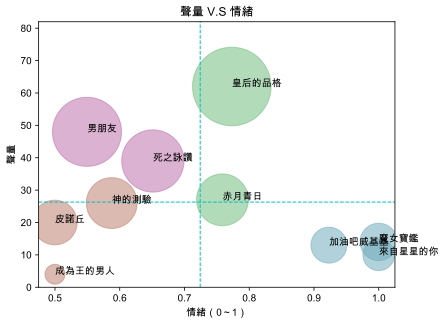

In [16]:
axe_list = []
for i in range(len(mv_emotion)):
    if mv_emotion[i] > np.mean(mv_emotion) and mv_voice[i] > np.mean(
        mv_voice
    ):  # 第一象限
        color = "#66b877"
        axe = "第一象限"

    elif mv_emotion[i] > np.mean(mv_emotion) and mv_voice[i] <= np.mean(
        mv_voice
    ):  # 第四象限
        color = "#66a7b8"
        axe = "第四象限"

    elif mv_emotion[i] <= np.mean(mv_emotion) and mv_voice[i] > np.mean(
        mv_voice
    ):  # 第二象限
        color = "#b866a7"
        axe = "第二象限"

    else:  # 第三象限
        color = "#b87766"
        axe = "第三象限"

    # 繪製圓點
    plt.scatter(mv_emotion[i], mv_voice[i], color=color, s=100 * mv_voice[i], alpha=0.5)
    # plt.scatter(mv_emotion[i],mv_voice[i], color=color,alpha=0.5)
    # plt.scatter(mv_emotion[i],mv_voice[i], color=color,s=5000,alpha=0.5)

    # 加上文字註解
    plt.text(
        mv_emotion[i],
        mv_voice[i],
        movie[i],
    )

    # 儲存象限資料
    axe_list.append(axe)

plt.axhline(
    float(np.mean(mv_voice)), color="c", linestyle="dashed", linewidth=1
)  # 繪製平均線
plt.axvline(
    float(np.mean(mv_emotion)), color="c", linestyle="dashed", linewidth=1
)  # 繪製平均線

plt.title(
    "聲量 V.S 情緒",
)  # 標題
plt.ylabel(
    "聲量",
)  # y的標題
plt.xlabel(
    "情緒（0～1）",
)  # x的標題
plt.ylim(0, max(allmv_voice["聲量"] + 20))
plt.show()

將聲量情緒象限資料儲存起來。


In [17]:
allmv_VEA_df = pd.DataFrame(
    zip(movie, mv_voice, mv_emotion, axe_list),
    columns=["電影名稱", "聲量", "情緒", "象限"],
)
allmv_VEA_df

,電影名稱,聲量,情緒,象限
0,成為王的男人,4,0.500005,第三象限
1,皇后的品格,62,0.773075,第一象限
2,赤月青日,27,0.758588,第一象限
3,神的測驗,26,0.587640,第三象限
4,死之詠讚,39,0.651151,第二象限
5,加油吧威基基,13,0.923072,第四象限
6,皮諾丘,20,0.499767,第三象限
7,魔女寶鑑,14,1.000000,第四象限
8,男朋友,48,0.549452,第二象限
9,來自星星的你,10,0.999950,第四象限


繪製長條與折線


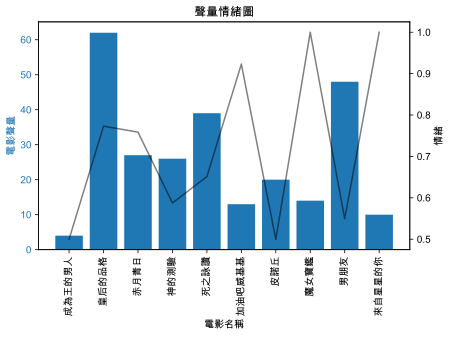

In [18]:
fig, ax1 = plt.subplots()

plt.title("聲量情緒圖")
plt.xlabel("電影名稱")
plt.xticks(rotation=90)
ax2 = ax1.twinx()

# ax1
ax1.bar(allmv_VEA_df["電影名稱"], allmv_VEA_df["聲量"])
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_ylabel("電影聲量", color="tab:blue")
# ax1.axhline(np.mean(mv_voice), color='tab:blue', linestyle='dashed', linewidth=1) # 繪製平均線

# ax2
ax2.plot(allmv_VEA_df["電影名稱"], allmv_VEA_df["情緒"], alpha=0.5, color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylabel("情緒", color="black")
# ax2.axhline(np.mean(mv_emotion), color='black', linestyle='dashed', linewidth=1) # 繪製平均線

fig.tight_layout()
plt.show()

## 問題

請以 X 軸電影豆瓣分數, Y 軸電影聲量畫出(1)電影聲量豆瓣分數象限圖，圓形大小為情緒分數\*7000，需要標註出電影名稱 (2)電影聲量豆瓣分數長條折線圖
各十部電影豆瓣分數 [6.9, 7.5, 8.6, 7.8, 8.5, 9.3, 6.8, 8.6, 8.2, 5.9] ，圖表中需要標註數值(3)哪部電影的豆瓣分數最高，該電影位於哪個象限？


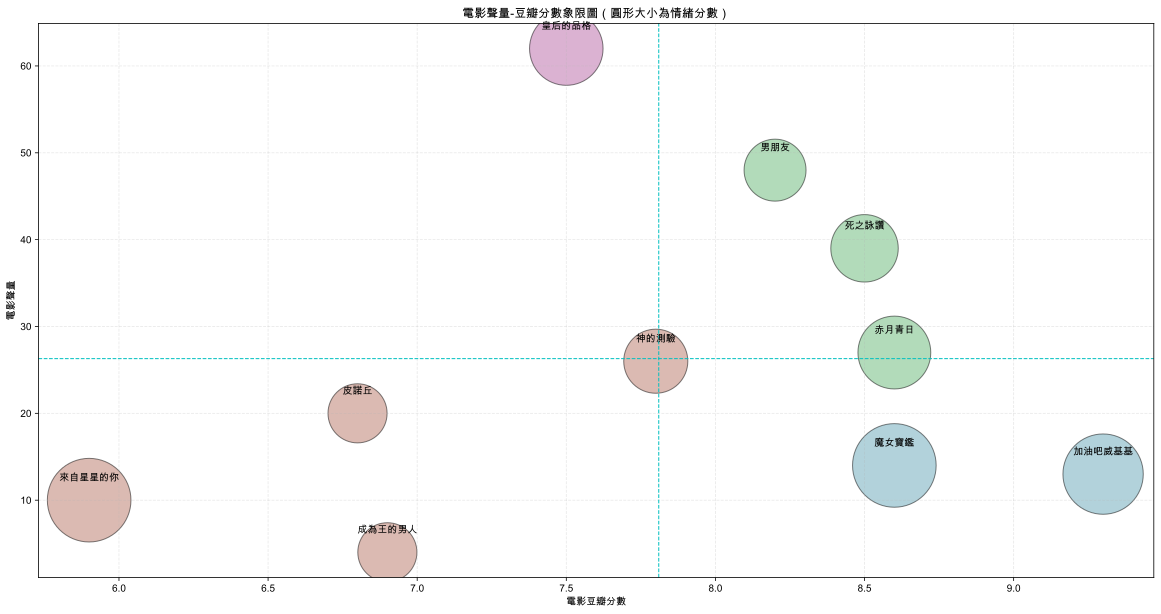

In [21]:
# (1) 豆瓣分數與聲量象限圖
douban_scores = [6.9, 7.5, 8.6, 7.8, 8.5, 9.3, 6.8, 8.6, 8.2, 5.9]
mean_score = np.mean(douban_scores)
mean_voice = np.mean(mv_voice)

plt.figure(figsize=(20, 10))
for idx, name in enumerate(movie):
    # 象限顏色
    if douban_scores[idx] > mean_score and mv_voice[idx] > mean_voice:
        color = "#66b877"  # 第一象限
        axe = "第一象限"
    elif douban_scores[idx] > mean_score and mv_voice[idx] <= mean_voice:
        color = "#66a7b8"  # 第四象限
        axe = "第四象限"
    elif douban_scores[idx] <= mean_score and mv_voice[idx] > mean_voice:
        color = "#b866a7"  # 第二象限
        axe = "第二象限"
    else:
        color = "#b87766"  # 第三象限
        axe = "第三象限"
    plt.scatter(
        douban_scores[idx],
        mv_voice[idx],
        s=mv_emotion[idx] * 7000,
        color=color,
        alpha=0.5,
        label=axe if idx == 0 else "",
        edgecolors="k",
    )
    plt.text(
        douban_scores[idx],
        mv_voice[idx] + 2,
        name,
        ha="center",
        va="bottom",
    )

plt.axhline(mean_voice, color="c", linestyle="dashed", linewidth=1)
plt.axvline(mean_score, color="c", linestyle="dashed", linewidth=1)
plt.xlabel("電影豆瓣分數")
plt.ylabel("電影聲量")
plt.title("電影聲量-豆瓣分數象限圖（圓形大小為情緒分數）")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

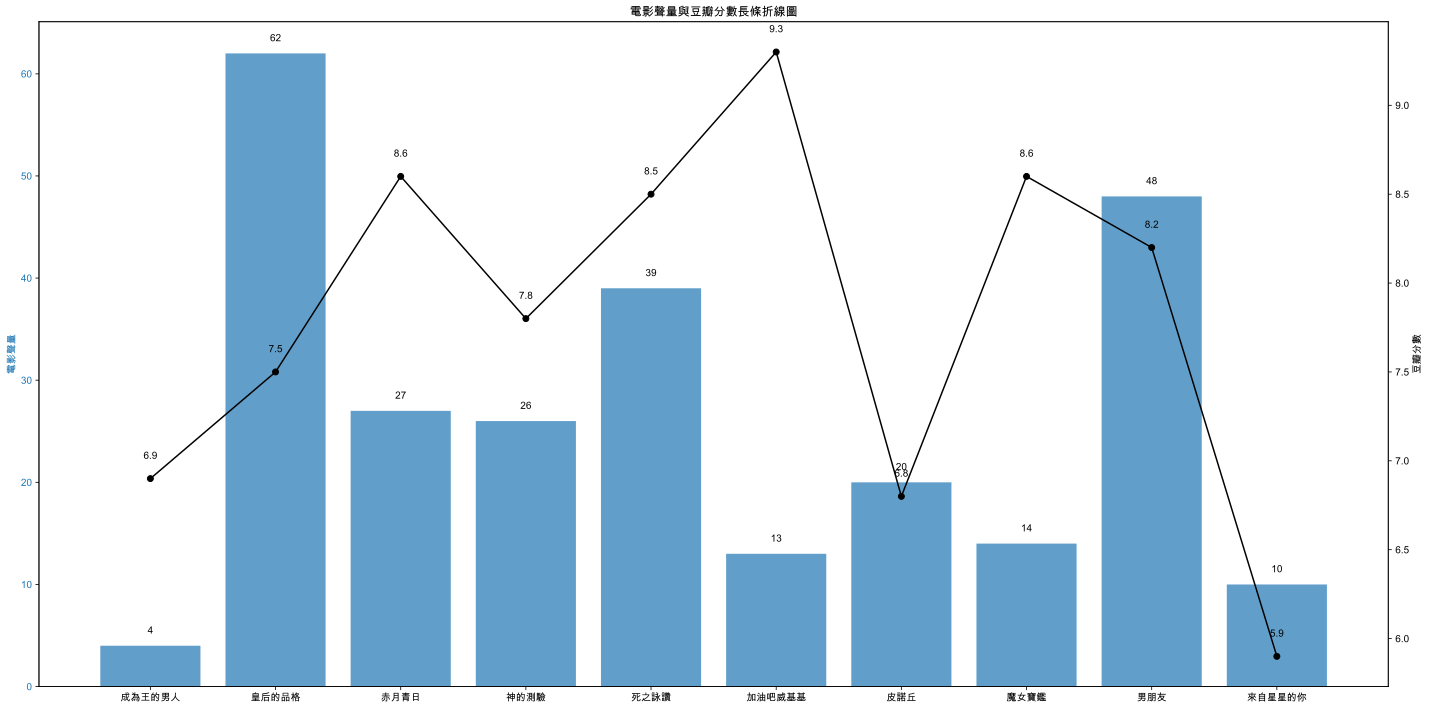

In [22]:
# (2) 長條折線圖
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
plt.title("電影聲量與豆瓣分數長條折線圖")
plt.xlabel("電影名稱")
plt.xticks(range(len(movie)), movie, rotation=90)

# 長條圖：聲量
bars = ax1.bar(range(len(movie)), mv_voice, color="tab:blue", alpha=0.7, label="聲量")
ax1.set_ylabel("電影聲量", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
for idx, bar in enumerate(bars):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(mv_voice[idx]),
        ha="center",
        va="bottom",
    )

# 折線圖：豆瓣分數
ax2.plot(range(len(movie)), douban_scores, color="black", marker="o", label="豆瓣分數")
ax2.set_ylabel("豆瓣分數", color="black")
ax2.tick_params(axis="y", labelcolor="black")
for idx, score in enumerate(douban_scores):
    ax2.text(
        idx,
        score + 0.1,
        f"{score:.1f}",
        ha="center",
        va="bottom",
        color="black",
    )

fig.tight_layout()
plt.show()

In [23]:
# (3) 豆瓣分數最高電影及其象限
max_idx = np.argmax(douban_scores)
max_movie = movie[max_idx]
max_score = douban_scores[max_idx]
max_voice = mv_voice[max_idx]
max_emotion = mv_emotion[max_idx]
# 判斷象限
if max_score > mean_score and max_voice > mean_voice:
    max_axe = "第一象限"
elif max_score > mean_score and max_voice <= mean_voice:
    max_axe = "第四象限"
elif max_score <= mean_score and max_voice > mean_voice:
    max_axe = "第二象限"
else:
    max_axe = "第三象限"

print(f"豆瓣分數最高的電影是「{max_movie}」，分數為{max_score}，位於{max_axe}。")

豆瓣分數最高的電影是「加油吧威基基」，分數為9.3，位於第四象限。
